# Exam 1 Take-Home Portion

# Evan Callaghan

In [ ]:
pip install tensorflow

In [24]:
## 1. a) Using the pandas library to read the csv data file and create a data-frame called college

import boto3
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
import tensorflow as tf
from sklearn.metrics import recall_score
from sklearn.svm import SVC
import matplotlib.pyplot as plt

## Defining the bucket
s3 = boto3.resource('s3')
bucket_name = 'data-445-bucket-callaghan'
bucket = s3.Bucket(bucket_name)

## Defining the csv file
file_key = 'College.csv'

bucket_object = bucket.Object(file_key)
file_object = bucket_object.get()
file_content_stream = file_object.get('Body')

college = pd.read_csv(file_content_stream)

college.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [3]:
## b) Changing the Private variable from a categorical variable to a numerical variable

college['Private'] = np.where(college['Private'] == 'Yes', 1, 0)

In [4]:
## c) Using Private, F.Undergrad, P.Undergrad, Outstate, Room.Board, Books, Personal, S.F.Ratio and Grad.Rate as the predictor variables, 
## and Apps as the target variable to split the data into train (80%) and test (20%)

X = college[['Private', 'F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board', 'Books', 'Personal', 'S.F.Ratio', 'Grad.Rate']]
Y = college['Apps']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [5]:
## d) Using the MinMaxScaler to transform the input variables in the train and test dataset to 0-1 scale

scaler = MinMaxScaler(feature_range = (0,1))
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [6]:
## e) Using the train dataset to build a linear regression model

## Building the model
lm_md = LinearRegression().fit(X_train, Y_train)

# Predicting the number of applications on the test set
lm_preds = lm_md.predict(X_test)

## Computing the MSE
lm_mse = np.mean(np.power(lm_preds - Y_test, 2))

print('MSE of Linear Regression Model:', lm_mse)

## The MSE of the first linear regression model is about 3,274,557

MSE of Linear Regression Model: 3274557.072776562


In [7]:
## f) Using the train dataset to build a ridge regression model as follows:

## Estimating the optimal lambda via cross-validation using 5-folds
ridge_cv = RidgeCV(alphas = np.linspace(0.001, 100, num = 100), cv = 5).fit(X_train, Y_train)

## Extracting the optimal lambda value
ridge_alpha = ridge_cv.alpha_

## Building the ridge model with the optimal lambda
ridge_md = Ridge(alpha = ridge_alpha).fit(X_train, Y_train)

## Predicting on the test set
ridge_preds = ridge_md.predict(X_test)

## Calculating the MSE of ridge model
ridge_mse = np.mean(np.power(ridge_preds - Y_test, 2))

print('MSE of Ridge Regression Model:', ridge_mse)

## The MSE of the first linear regression model is about 3,109,462

MSE of Ridge Regression Model: 3109462.862597714


In [8]:
## g) Using the train dataset to build a LASSO regression model as follows:

## Estimating the optimal lambda via cross-validation using 5-folds
lasso_cv = LassoCV(alphas = np.linspace(0.001, 100, num = 100), cv = 5).fit(X_train, Y_train)

## Extracting the optimal alpha 
lasso_alpha = lasso_cv.alpha_

## Using the optimal lambda to build the LASSO regression model
lasso_md = Lasso(alpha = lasso_alpha).fit(X_train, Y_train)

## Predicting on the test set
lasso_preds = lasso_md.predict(X_test)

## Calculating the MSE of lasso model
lasso_mse = np.mean(np.power(lasso_preds - Y_test, 2))

print('MSE of Lasso Regression Model:', lasso_mse)

## The MSE of the first linear regression model is about 3,311,762

MSE of Lasso Regression Model: 3311762.509492541


In [9]:
## h) Using the results from parts (e), (f) and (g), I would use the Ridge Regression model to predict the number 
## of applications that a university will receive because it has the smallest MSE value of the three considered
## models.

In [25]:
## 2. a) Using the pandas library to read the csv data file and create two data-frames called: 
## telecom train (for churn-bigml-80.csv) and telecom test (for churn-bigml-20.csv)

## Defining the csv file
file_key = 'churn-bigml-80.csv'
file_key_2 = 'churn-bigml-20.csv'

bucket_object = bucket.Object(file_key)
bucket_object_2 = bucket.Object(file_key_2)

file_object = bucket_object.get()
file_object_2 = bucket_object_2.get()

file_content_stream = file_object.get('Body')
file_content_stream_2 = file_object_2.get('Body')

telecom_train = pd.read_csv(file_content_stream)
telecom_test = pd.read_csv(file_content_stream_2)

In [26]:
## b) Variable engineering:

## Changing the Churn variable from a categorical variable to a numerical variable
telecom_train['Churn'] = np.where(telecom_train['Churn'] == False, 0, 1)
telecom_test['Churn'] = np.where(telecom_test['Churn'] == False, 0, 1)

## Changing the International plan variable from a categorical variable to a numerical variable
telecom_train['International_plan'] = np.where(telecom_train['International_plan'] == 'No', 0, 1)
telecom_test['International_plan'] = np.where(telecom_test['International_plan'] == 'No', 0, 1)


## Changing the Voice mail plan variable from a categorical variable to a numerical variable
telecom_train['Voice_mail_plan'] = np.where(telecom_train['Voice_mail_plan'] == 'No', 0, 1)
telecom_test['Voice_mail_plan'] = np.where(telecom_test['Voice_mail_plan'] == 'No', 0, 1)


## Creating a new variable called 'total_charge' as the sum of 'Total_day_charge', 'Total_eve_charge', 'Total_night_charge',
## and 'Total_intl_charge' in both dataframes
telecom_train['total_charge'] = telecom_train['Total_day_charge'] + telecom_train['Total_eve_charge'] + telecom_train['Total_night_charge'] + telecom_train['Total_intl_charge']
telecom_test['total_charge'] = telecom_test['Total_day_charge'] + telecom_test['Total_eve_charge'] + telecom_test['Total_night_charge'] + telecom_test['Total_intl_charge']



In [27]:
## c) In both data-frames telecom train and telecom test, only keeping the following variables: Account length, International plan, 
## Voice mail plan, total charge, Customer service calls, and Churn.

telecom_train = telecom_train[['Account_length', 'International_plan', 'Voice_mail_plan', 'total_charge', 'Customer_service_calls', 'Churn']]
telecom_test = telecom_test[['Account_length', 'International_plan', 'Voice_mail_plan', 'total_charge', 'Customer_service_calls', 'Churn']]

In [13]:
## d) Considering the telecom train dataset and using Account length, International plan, Voice mail plan, total charge, and 
## Customer service calls as the input variables, and Churn is the target variable to do the following:

X = telecom_train[['Account_length', 'International_plan', 'Voice_mail_plan', 'total_charge', 'Customer_service_calls']]
Y = telecom_train['Churn']

## Repeating steps 1000 times and storing the estimated model coefficients of each iteration in a data-frame

## Defining coefficients data frame
coefficients = pd.DataFrame(columns = ['Account_length', 'International_plan', 'Voice_mail_plan', 'total_charge', 'Customer_service_calls'])

for i in range(0, 1000):
    
    ## Splitting the data into train (80%) and test (20%) (taking into account the proportion of 0s and 1s in the data) 
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, stratify = Y)

    ## Using MinMaxScaler to transform all the input variables in the train and test datasets to 0-1 scale
    scaler = MinMaxScaler(feature_range = (0,1))
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.fit_transform(X_test)

    ## Estimating the optimal lambda for the LASSO model using default values for lambda in scikit-learn and 5-folds
    lasso_cv = LassoCV(cv = 5).fit(X_train, Y_train)
    lasso_alpha = lasso_cv.alpha_

    ## Performing LASSO as a variable selector
    lasso_md = Lasso(alpha = lasso_alpha).fit(X_train, Y_train)
    
    ## Extracting the estimated coefficients and putting them into a data frame
    coefs = pd.DataFrame(lasso_md.coef_).T
    coefs.columns = ['Account_length', 'International_plan', 'Voice_mail_plan', 'total_charge', 'Customer_service_calls']
    
    ## Appending the coefficients into the data frame for all coefficients
    dataframes = [coefficients, coefs]
    coefficients = pd.concat(dataframes)

    
coefficients = coefficients.reset_index().drop(columns = ['index'])


In [14]:
## Removing the variables whose estimated coefficients is 0 more than 200 times

n = coefficients.shape[0]
m = coefficients.shape[1]

for i in range(0, m):
    
    zero_count = 0
    
    for j in range(0, n):
        
        if (coefficients.iloc[j, i] == 0):
            zero_count += 1
            
    print("Column Number:", i)
    print("Zero Count:", zero_count)
    
## Since the column "Account_length" has been set to zero more than 200 times, we are dropping it from the train and test sets

Column Number: 0
Zero Count: 277
Column Number: 1
Zero Count: 0
Column Number: 2
Zero Count: 0
Column Number: 3
Zero Count: 0
Column Number: 4
Zero Count: 0


In [28]:
telecom_train = telecom_train.drop(columns = ['Account_length'], axis = 1)
telecom_test = telecom_test.drop(columns = ['Account_length'], axis = 1)

In [29]:
## e) Using Churn as the target variable, and the remaining variables as the input variables to do the following:

X = telecom_train[['International_plan', 'Voice_mail_plan', 'total_charge', 'Customer_service_calls']]
Y = telecom_train['Churn']

## Using MinMaxScaler to transform all the input variables in the train and test datasets to 0-1 scale
scaler = MinMaxScaler(feature_range = (0,1))
X = scaler.fit_transform(X)
X = pd.DataFrame(X)

## Defining empty lists to store results
md1_results = []
md2_results = []
md3_results = []
md4_results = []

## Splitting the data into 5-folds taking into account the proportion of 0s and 1s in the data
kfold = StratifiedKFold(n_splits = 5, shuffle = True)

for train_ix, test_ix in kfold.split(X, Y):
    
    ## Defining the data 
    X_train, X_val = X.loc[train_ix], X.loc[test_ix]
    Y_train, Y_val = Y.loc[train_ix], Y.loc[test_ix]
    
    
    #################
    ## FIRST MODEL ##
    #################
    
    ## Building a multi-layer perceptron (MLP) model with one single hidden layer with 5 neurons (hyperbolic tangent as 
    ## the activation function) and softmax as the activation function for the output. Using the stochastic descent gradient 
    ## as the method to estimate the weights (optimizer = ’sgd’, loss = ’categorical crossentropy’, and metrics = [’accuracy’]).
    ## Use epochs = 100 and batch size = 100 to build the model
    
    md1 = tf.keras.models.Sequential([
        tf.keras.layers.Dense(5, input_dim = 4, activation = 'tanh'),
        tf.keras.layers.Dense(2, activation = 'softmax')
    ])

    md1.compile(optimizer = 'sgd', loss = 'categorical_crossentropy', metrics = ['accuracy'])

    ## Fitting the model and using the model to predict on the test dataset
    model1 = md1.fit(X_train, tf.keras.utils.to_categorical(Y_train, num_classes = 2), epochs = 100, batch_size = 100,
               validation_data = (X_val, tf.keras.utils.to_categorical(Y_val, num_classes = 2)), verbose = 0)

    ## Reporting the recall score of this model. Using 10% as the cut-off value
    md1_preds = md1.predict(X_val)[:, 1]
    md1_preds = np.where(md1_preds < 0.1, 0, 1)
    
    md1_results.append(recall_score(Y_val, md1_preds))
    
    
    ##################
    ## SECOND MODEL ##
    ##################
    
    ## Building a multi-layer perceptron (MLP) model with one single hidden layer with 5 neurons (ReLU as the 
    ## activation function) and softmax as the activation function for the output. Using the stochastic descent 
    ## gradient as the method to estimate the weights (optimizer = ’sgd’, loss = ’categorical crossentropy’ and metrics 
    ## = [’accuracy’]). Using epochs = 100 and batch size = 100 to build the model
    
    md2 = tf.keras.models.Sequential([
        tf.keras.layers.Dense(5, input_dim = 4, activation = 'relu'),
        tf.keras.layers.Dense(2, activation = 'softmax')
    ])

    md2.compile(optimizer = 'sgd', loss = 'categorical_crossentropy', metrics = ['accuracy'])

    ## Fitting the model and using the model to predict on the test dataset
    model2 = md2.fit(X_train, tf.keras.utils.to_categorical(Y_train, num_classes = 2), epochs = 100, batch_size = 100,
               validation_data = (X_val, tf.keras.utils.to_categorical(Y_val, num_classes = 2)), verbose = 0)

    ## Reporting the recall score of this model. Using 10% as the cut-off value
    md2_preds = md2.predict(X_val)[:, 1]
    md2_preds = np.where(md2_preds < 0.1, 0, 1)
    
    md2_results.append(recall_score(Y_val, md2_preds))
    
    
    #################
    ## THIRD MODEL ##
    #################
    
    ## Building a support vector machine model using rbf as the kernel. After that, using the model to predict on the test dataset 
    md3 = SVC(kernel = 'rbf', probability = True).fit(X_train, Y_train)

    ## Predicting on the test data set. Using 10% as the cut-off value.
    md3_preds = md3.predict_proba(X_val)[:, 1]
    md3_preds = np.where(md3_preds < 0.1, 0, 1)

    md3_results.append(recall_score(Y_val, md3_preds))
    
    
    ##################
    ## FOURTH MODEL ##
    ##################
    
    ## Building a support vector machine model using poly as the kernel. After that, using the model to predict on the test dataset
    md4 = SVC(kernel = 'poly', probability = True).fit(X_train, Y_train)

    ## Predicting on the test data set. Using 10% as the cut-off value.
    md4_preds = md4.predict_proba(X_val)[:, 1]
    md4_preds = np.where(md4_preds < 0.1, 0, 1)

    md4_results.append(recall_score(Y_val, md4_preds))
    

    
print('Average Recall Score for Model 1:', np.mean(md1_results))
print('Average Recall Score for Model 2:', np.mean(md2_results))
print('Average Recall Score for Model 3:', np.mean(md3_results))
print('Average Recall Score for Model 4:', np.mean(md4_results))

Average Recall Score for Model 1: 0.9225774225774226
Average Recall Score for Model 2: 0.9459207459207459
Average Recall Score for Model 3: 0.8891774891774892
Average Recall Score for Model 4: 0.8271395271395272


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
Over the 100 iterations...

Average Recall Score for Model 1: 0.9182947052947054
Average Recall Score for Model 2: 0.9390829170829171
Average Recall Score for Model 3: 0.8867972027972028
Average Recall Score for Model 4: 0.835805194805195


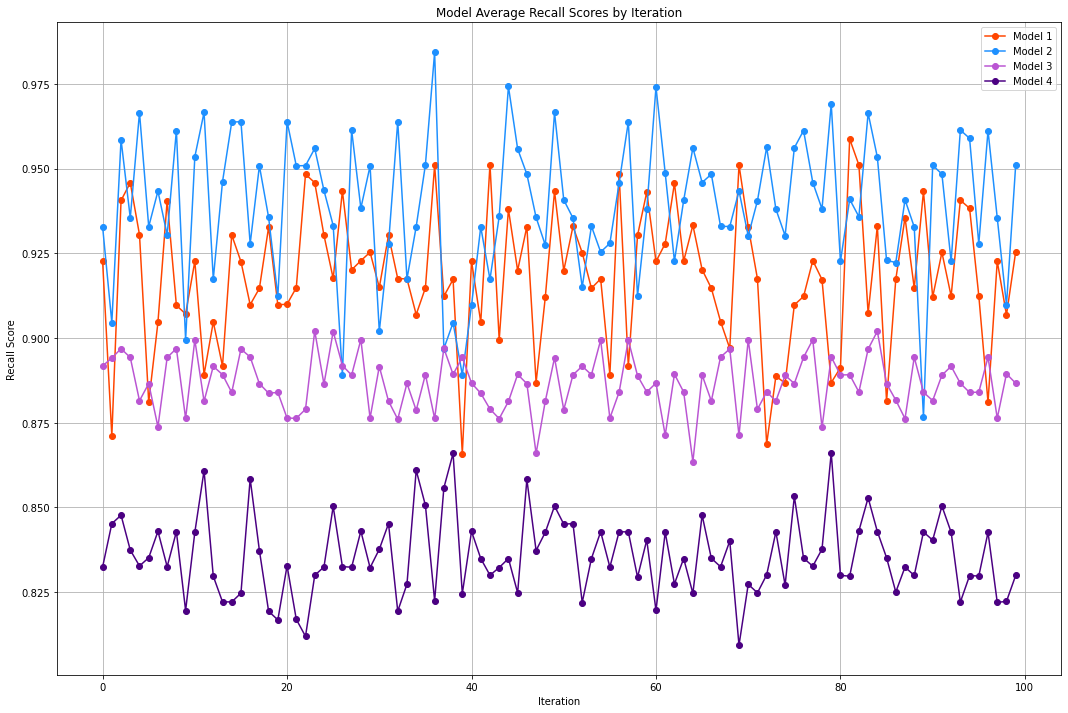

In [30]:
## f) Repeating part (e) 100 times

X = telecom_train[['International_plan', 'Voice_mail_plan', 'total_charge', 'Customer_service_calls']]
Y = telecom_train['Churn']

## Using MinMaxScaler to transform all the input variables in the train and test datasets to 0-1 scale
scaler = MinMaxScaler(feature_range = (0,1))
X = scaler.fit_transform(X)
X = pd.DataFrame(X)

## Defining empty lists to store kfold iteration average recall scores
md1_100 = []
md2_100 = []
md3_100 = []
md4_100 = []


for i in range(0, 100):
    
    ## Defining empty lists to store recall scores
    md1_results = []
    md2_results = []
    md3_results = []
    md4_results = []

    ## Splitting the data into 5-folds taking into account the proportion of 0s and 1s in the data
    kfold = StratifiedKFold(n_splits = 5, shuffle = True)

    for train_ix, test_ix in kfold.split(X, Y):
    
        ## Defining the data 
        X_train, X_val = X.loc[train_ix], X.loc[test_ix]
        Y_train, Y_val = Y.loc[train_ix], Y.loc[test_ix]
    
    
        #################
        ## FIRST MODEL ##
        #################
    
        ## Building a multi-layer perceptron (MLP) model with one single hidden layer with 5 neurons (hyperbolic tangent as 
        ## the activation function) and softmax as the activation function for the output. Using the stochastic descent gradient 
        ## as the method to estimate the weights (optimizer = ’sgd’, loss = ’categorical crossentropy’, and metrics = [’accuracy’]).
        ## Use epochs = 100 and batch size = 100 to build the model
    
        md1 = tf.keras.models.Sequential([
            tf.keras.layers.Dense(5, input_dim = 4, activation = 'tanh'),
            tf.keras.layers.Dense(2, activation = 'softmax')
        ])

        md1.compile(optimizer = 'sgd', loss = 'categorical_crossentropy', metrics = ['accuracy'])

        ## Fitting the model and using the model to predict on the test dataset
        model1 = md1.fit(X_train, tf.keras.utils.to_categorical(Y_train, num_classes = 2), epochs = 100, batch_size = 100,
                   validation_data = (X_val, tf.keras.utils.to_categorical(Y_val, num_classes = 2)), verbose = 0)

        ## Reporting the recall score of this model. Using 10% as the cut-off value
        md1_preds = md1.predict(X_val)[:, 1]
        md1_preds = np.where(md1_preds < 0.1, 0, 1)
    
        md1_results.append(recall_score(Y_val, md1_preds))
    
    
        ##################
        ## SECOND MODEL ##
        ##################
    
        ## Building a multi-layer perceptron (MLP) model with one single hidden layer with 5 neurons (ReLU as the 
        ## activation function) and softmax as the activation function for the output. Using the stochastic descent 
        ## gradient as the method to estimate the weights (optimizer = ’sgd’, loss = ’categorical crossentropy’ and metrics 
        ## = [’accuracy’]). Using epochs = 100 and batch size = 100 to build the model
    
        md2 = tf.keras.models.Sequential([
            tf.keras.layers.Dense(5, input_dim = 4, activation = 'relu'),
            tf.keras.layers.Dense(2, activation = 'softmax')
        ])

        md2.compile(optimizer = 'sgd', loss = 'categorical_crossentropy', metrics = ['accuracy'])

        ## Fitting the model and using the model to predict on the test dataset
        model2 = md2.fit(X_train, tf.keras.utils.to_categorical(Y_train, num_classes = 2), epochs = 100, batch_size = 100,
                   validation_data = (X_val, tf.keras.utils.to_categorical(Y_val, num_classes = 2)), verbose = 0)

        ## Reporting the recall score of this model. Using 10% as the cut-off value
        md2_preds = md2.predict(X_val)[:, 1]
        md2_preds = np.where(md2_preds < 0.1, 0, 1)
    
        md2_results.append(recall_score(Y_val, md2_preds))
    
    
        #################
        ## THIRD MODEL ##
        #################
    
        ## Building a support vector machine model using rbf as the kernel. After that, using the model to predict on the test dataset 
        md3 = SVC(kernel = 'rbf', probability = True).fit(X_train, Y_train)

        ## Predicting on the test data set. Using 10% as the cut-off value.
        md3_preds = md3.predict_proba(X_val)[:, 1]
        md3_preds = np.where(md3_preds < 0.1, 0, 1)

        md3_results.append(recall_score(Y_val, md3_preds))
    
    
        ##################
        ## FOURTH MODEL ##
        ##################
    
        ## Building a support vector machine model using poly as the kernel. After that, using the model to predict on the test dataset
        md4 = SVC(kernel = 'poly', probability = True).fit(X_train, Y_train)

        ## Predicting on the test data set. Using 10% as the cut-off value.
        md4_preds = md4.predict_proba(X_val)[:, 1]
        md4_preds = np.where(md4_preds < 0.1, 0, 1)

        md4_results.append(recall_score(Y_val, md4_preds))
        
        
    ## Appending mean recall score 
    md1_100.append(np.mean(md1_results))
    md2_100.append(np.mean(md2_results))
    md3_100.append(np.mean(md3_results))
    md4_100.append(np.mean(md4_results))
    print(i)
    

    
## Reporting the average recall of each of the models for the 100 repetitions
print('Over the 100 iterations...\n')
print('Average Recall Score for Model 1:', np.mean(md1_100))
print('Average Recall Score for Model 2:', np.mean(md2_100))
print('Average Recall Score for Model 3:', np.mean(md3_100))
print('Average Recall Score for Model 4:', np.mean(md4_100))


## Creating a visualization that shows the recall value for each of the models at each iteration
fig = plt.figure(figsize = (18, 12))
iterations = range(0, 100)

plt.plot(iterations, md1_100, marker = 'o', color = 'orangered', label = 'Model 1')
plt.plot(iterations, md2_100, marker = 'o', color = 'dodgerblue', label = 'Model 2')
plt.plot(iterations, md3_100, marker = 'o', color = 'mediumorchid', label = 'Model 3')
plt.plot(iterations, md4_100, marker = 'o', color = 'indigo', label = 'Model 4')
plt.title('Model Average Recall Scores by Iteration')
plt.xlabel('Iteration')
plt.ylabel('Recall Score')
plt.legend()
plt.grid()
plt.show()


## The second MLP model and the first SVM model would be used to predict customer Churn because they show the highest recall scores of the 
## considered models

In [31]:
## g)

## Defining the input/target variables for the train and test sets
X_train = telecom_train[['International_plan', 'Voice_mail_plan', 'total_charge', 'Customer_service_calls']]
X_test = telecom_test[['International_plan', 'Voice_mail_plan', 'total_charge', 'Customer_service_calls']]

Y_train = telecom_train['Churn']
Y_test = telecom_test['Churn']


## Using the MinMaxScaler function to transform each of the input variables in the telecom train and telecom test data-frames to a 0-1 scale
scaler = MinMaxScaler(feature_range = (0,1))
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

## Using telecom_train to build two models: the better MLP model (Model 2) and the better support vector machine (Model 3)

###############
## MLP Model ##
###############

mlp = tf.keras.models.Sequential([
    tf.keras.layers.Dense(5, input_dim = 4, activation = 'relu'),
    tf.keras.layers.Dense(2, activation = 'softmax')
])

mlp.compile(optimizer = 'sgd', loss = 'categorical_crossentropy', metrics = ['accuracy'])

## Fitting the model and using the model to predict on the test dataset
model1 = mlp.fit(X_train, tf.keras.utils.to_categorical(Y_train, num_classes = 2), epochs = 100, batch_size = 100,
                 validation_data = (X_test, tf.keras.utils.to_categorical(Y_test, num_classes = 2)), verbose = 0)

## Predicting the likelihood of Churn on the telecom_test data-frame (Using 10% as the cut-off value)
mlp_preds = mlp.predict(X_test)[:, 1]
mlp_preds = np.where(mlp_preds < 0.1, 0, 1)
    
## Computing the recall of the MLP Model
mlp_recall = recall_score(Y_test, mlp_preds)

print('Recall Score of MLP Model:', mlp_recall)


###############
## SVM Model ##
###############

svm = SVC(kernel = 'rbf', probability = True).fit(X_train, Y_train)

## Predicting the likelihood of Churn on the telecom_test data-frame (Using 10% as the cut-off value)
svm_preds = svm.predict_proba(X_test)[:, 1]
svm_preds = np.where(svm_preds < 0.1, 0, 1)

## Computing the recall of the MLP Model
svm_recall = recall_score(Y_test, svm_preds)

print('Recall Score of SVM Model:', svm_recall)


## I would use the MLP model to predict Churn because it has a higher recall score.

Recall Score of MLP Model: 0.9368421052631579
Recall Score of SVM Model: 0.9263157894736842
